# Evaluate the Cosine Similarity Embeddings 



In [29]:
import pandas as pd 
import numpy as np 


## Grab the DataFrames

In [30]:
import sys

# set this on the path so that we can reference the commong data locations
sys.path.append("../scripts/")

In [31]:
from data_collection import authenticate_google_drive, grab_google_drive_folder_data

drive = authenticate_google_drive('0_data_collection/credentials/google_drive_client_secret.json')

In [32]:
# Grab the tokenization 
# file_path = "data_encoded_multi-qa-mpnet-base-dot-v1"
# file_path = "data_encoded_multilingual-e5-small"
# multi_qa_df = grab_google_drive_folder_data(drive=drive,credential_file="0_data_collection/credentials/google_drive_embedded_folder_id.json",filename=file_path)


In [33]:
# Grab the cosine_similarity dataframes
file_path = "cosine_similarity_scores.csv"
cosine_similarity_score_df = grab_google_drive_folder_data(drive=drive,credential_file="0_data_collection/credentials/google_drive_folder_id.json",filename=file_path)



Successfully loaded 'cosine_similarity_scores.csv' into a DataFrame!


In [34]:
# #check the columns that are in this dataset 
print(list(cosine_similarity_score_df.columns )) 
cosine_similarity_score_df.head() 


['submission_id', 'subredit_topic', 'search_query', 'title', 'text', 'score', 'num_comments', 'username', 'created_at', 'multi-qa-mpnet-base-dot-v1_positive', 'multi-qa-mpnet-base-dot-v1_negative', 'thenlper/gte-large_positive', 'thenlper/gte-large_negative', 'BAAI/bge-m3_positive', 'BAAI/bge-m3_negative', 'intfloat/multilingual-e5-small_positive', 'intfloat/multilingual-e5-small_negative', 'positive_query', 'negative_query']


,submission_id,subredit_topic,search_query,title,text,score,num_comments,username,created_at,multi-qa-mpnet-base-dot-v1_positive,multi-qa-mpnet-base-dot-v1_negative,thenlper/gte-large_positive,thenlper/gte-large_negative,BAAI/bge-m3_positive,BAAI/bge-m3_negative,intfloat/multilingual-e5-small_positive,intfloat/multilingual-e5-small_negative,positive_query,negative_query
0,1hqgmvb,FirstTimeHomeBuyer,Rocket Mortgage,Avoid Rocket Mortgage,I have a RM mortgage and they call me once a y...,603,191,maz4499,2024-12-31 15:12:06,0.467433,0.425255,0.779414,0.748677,0.521387,0.467496,0.799580,0.822769,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
1,1gum4oc,FirstTimeHomeBuyer,Rocket Mortgage,Is rocket mortgage that bad?,I’m in the market to buy a house now (21m). I ...,0,21,Valuable-Pilot-2818,2024-11-19 01:59:25,0.313784,0.239219,0.725817,0.694191,0.441253,0.346206,0.799297,0.799721,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
2,1541el1,FirstTimeHomeBuyer,Rocket Mortgage,WARNING- do NOT work with rocket mortgage!!!,EDIT: there is an extreme lack of transparency...,589,471,justmeAlonekitty,2023-07-19 17:31:01,0.502488,0.485551,0.769271,0.808871,0.552807,0.616200,0.807157,0.826281,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
3,1b3xvqv,FirstTimeHomeBuyer,Rocket Mortgage,Rocket Mortgage: An honest review,As a first time home buyer and a first generat...,36,71,Separate_Bar685,2024-03-01 16:04:32,0.412011,0.375052,0.788848,0.731924,0.512927,0.377663,0.792060,0.812041,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
4,1doitpg,FirstTimeHomeBuyer,Rocket Mortgage,Rocket Mortgage Everybody,Took all of my financial information and would...,0,23,varicoseballs,2024-06-25 22:31:06,0.351874,0.402635,0.756698,0.795089,0.434626,0.497404,0.774218,0.822798,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."


In [35]:
file_path = "1_process_data/labeled_data/combined_output.csv"
labelled_df = pd.read_csv(file_path)

In [36]:
labelled_df.head() 

,Unnamed: 0,submission_id,subredit_topic,search_query,combine_text,url,label,reviewer
0,0,1hcgjtw,personalfinance,Rocket Mortgage,Banker is trying to talk me into a cashout ref...,https://www.reddit.com/r/FirstTimeHomeBuyer/1h...,Neutral,aserban
1,1,1irwq2g,tax,Turbo Tax,Should we use turbo tax or get a tax professio...,https://www.reddit.com/r/FirstTimeHomeBuyer/1i...,Neutral,aserban
2,2,1eniv3b,personalfinance,Wells Fargo,"Roth IRA w/Wells Fargo, rollover IRA w/Fidelit...",https://www.reddit.com/r/FirstTimeHomeBuyer/1e...,Neutral,aserban
3,3,1ix1aur,IRS,Turbo Tax,Turbo Tax couldn’t deliver on the 5 day early ...,https://www.reddit.com/r/FirstTimeHomeBuyer/1i...,Negative,aserban
4,4,1dmahi0,RealEstate,Zillow,Propane or NG on Zillow?. I am looking to buy ...,https://www.reddit.com/r/FirstTimeHomeBuyer/1d...,Neutral,aserban


In [37]:
cosine_similarity_score_df.head() 

,submission_id,subredit_topic,search_query,title,text,score,num_comments,username,created_at,multi-qa-mpnet-base-dot-v1_positive,multi-qa-mpnet-base-dot-v1_negative,thenlper/gte-large_positive,thenlper/gte-large_negative,BAAI/bge-m3_positive,BAAI/bge-m3_negative,intfloat/multilingual-e5-small_positive,intfloat/multilingual-e5-small_negative,positive_query,negative_query
0,1hqgmvb,FirstTimeHomeBuyer,Rocket Mortgage,Avoid Rocket Mortgage,I have a RM mortgage and they call me once a y...,603,191,maz4499,2024-12-31 15:12:06,0.467433,0.425255,0.779414,0.748677,0.521387,0.467496,0.799580,0.822769,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
1,1gum4oc,FirstTimeHomeBuyer,Rocket Mortgage,Is rocket mortgage that bad?,I’m in the market to buy a house now (21m). I ...,0,21,Valuable-Pilot-2818,2024-11-19 01:59:25,0.313784,0.239219,0.725817,0.694191,0.441253,0.346206,0.799297,0.799721,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
2,1541el1,FirstTimeHomeBuyer,Rocket Mortgage,WARNING- do NOT work with rocket mortgage!!!,EDIT: there is an extreme lack of transparency...,589,471,justmeAlonekitty,2023-07-19 17:31:01,0.502488,0.485551,0.769271,0.808871,0.552807,0.616200,0.807157,0.826281,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
3,1b3xvqv,FirstTimeHomeBuyer,Rocket Mortgage,Rocket Mortgage: An honest review,As a first time home buyer and a first generat...,36,71,Separate_Bar685,2024-03-01 16:04:32,0.412011,0.375052,0.788848,0.731924,0.512927,0.377663,0.792060,0.812041,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
4,1doitpg,FirstTimeHomeBuyer,Rocket Mortgage,Rocket Mortgage Everybody,Took all of my financial information and would...,0,23,varicoseballs,2024-06-25 22:31:06,0.351874,0.402635,0.756698,0.795089,0.434626,0.497404,0.774218,0.822798,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."


### Merge the data together 


In [38]:
# Left join the datasets together 
combined_df  = pd.merge(labelled_df,cosine_similarity_score_df, how='left' , on=['submission_id', 'subredit_topic', 'search_query'])


In [39]:
combined_df.head() 

,Unnamed: 0,submission_id,subredit_topic,search_query,combine_text,url,label,reviewer,title,text,...,multi-qa-mpnet-base-dot-v1_positive,multi-qa-mpnet-base-dot-v1_negative,thenlper/gte-large_positive,thenlper/gte-large_negative,BAAI/bge-m3_positive,BAAI/bge-m3_negative,intfloat/multilingual-e5-small_positive,intfloat/multilingual-e5-small_negative,positive_query,negative_query
0,0,1hcgjtw,personalfinance,Rocket Mortgage,Banker is trying to talk me into a cashout ref...,https://www.reddit.com/r/FirstTimeHomeBuyer/1h...,Neutral,aserban,Banker is trying to talk me into a cashout ref...,"A little background, trying to borrow \~100k f...",...,0.273178,0.257725,0.708095,0.682507,0.430416,0.397636,0.775435,0.786102,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
1,1,1irwq2g,tax,Turbo Tax,Should we use turbo tax or get a tax professio...,https://www.reddit.com/r/FirstTimeHomeBuyer/1i...,Neutral,aserban,Should we use turbo tax or get a tax professio...,I have used TT for at least the last 7 years. ...,...,0.337967,0.294918,0.715634,0.686359,0.448315,0.393052,0.776792,0.802141,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
2,2,1eniv3b,personalfinance,Wells Fargo,"Roth IRA w/Wells Fargo, rollover IRA w/Fidelit...",https://www.reddit.com/r/FirstTimeHomeBuyer/1e...,Neutral,aserban,"Roth IRA w/Wells Fargo, rollover IRA w/Fidelit...","I have around $10,000 in a WellsFargo Roth IRA...",...,0.230517,0.194605,0.710653,0.686760,0.428669,0.392935,0.797070,0.804273,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
3,3,1ix1aur,IRS,Turbo Tax,Turbo Tax couldn’t deliver on the 5 day early ...,https://www.reddit.com/r/FirstTimeHomeBuyer/1i...,Negative,aserban,Turbo Tax couldn’t deliver on the 5 day early ...,Has this happened to anyone else? Has anyone g...,...,0.410005,0.483772,0.736017,0.739138,0.502871,0.503127,0.779282,0.815123,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."
4,4,1dmahi0,RealEstate,Zillow,Propane or NG on Zillow?. I am looking to buy ...,https://www.reddit.com/r/FirstTimeHomeBuyer/1d...,Neutral,aserban,Propane or NG on Zillow?,I am looking to buy in a few years. I was hopi...,...,0.205350,0.175084,0.702612,0.690053,0.343543,0.378241,0.766830,0.787916,I've had a fantastic experience with this comp...,"Terrible experience with this company, never u..."


In [40]:
import sys

# set this on the path so that we can reference the commong data locations
sys.path.append("../scripts/")

In [41]:
# Save to a google drive location
from data_collection import authenticate_google_drive, save_google_drive_data
# Grab the Google Drive object
drive = authenticate_google_drive('0_data_collection/credentials/google_drive_client_secret.json')
# Save the data in the Google Drive location
save_google_drive_data(drive=drive, 
                       credential_file="0_data_collection/credentials/google_drive_folder_id.json",  
                       dataframe=combined_df, 
                       filename="labelled_consine_similarity.csv")

File 'labelled_consine_similarity.csv' uploaded successfully to folder 1kJ6TrI9MVT5mfnnYvS-OpRMJFVbIQ6Tl!


In [42]:
### Analayze the result  
negative_values = {
'multi-qa-mpnet-base-dot-v1_negative': 'mean', 
'thenlper/gte-large_negative' : 'mean', 
'BAAI/bge-m3_negative': 'mean', 
'intfloat/multilingual-e5-small_negative': 'mean'
}

positive_values  = {
'multi-qa-mpnet-base-dot-v1_positive': 'mean', 
'thenlper/gte-large_positive' : 'mean', 
'BAAI/bge-m3_positive': 'mean',
'intfloat/multilingual-e5-small_positive': 'mean', 
}

# Understand the relationship between some of these calculated cosine fields and the true label
negative_aggregate = combined_df.groupby('label').agg(negative_values).reset_index()
positive_aggregate = combined_df.groupby('label').agg(positive_values).reset_index()

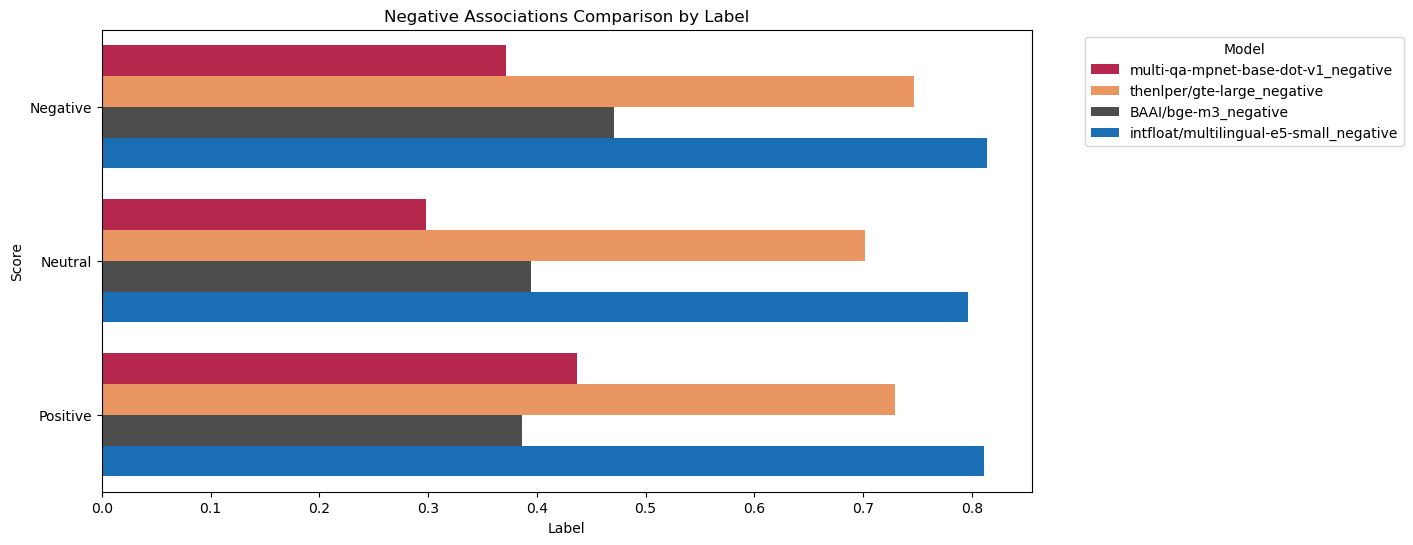

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt 

negative_aggregate
df_long = negative_aggregate.melt(id_vars='label', var_name='model', value_name='value')
# df_long.head() 


# Custom color palette for each model
negative_custom_palette = {
    'multi-qa-mpnet-base-dot-v1_negative': '#CE0F42',      
    'thenlper/gte-large_negative': '#FF914D',                 
    'BAAI/bge-m3_negative': '#4D4D4D',                     
    'intfloat/multilingual-e5-small_negative': '#0072CE'   
}

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(y='label', x='value', hue='model', data=df_long, palette=negative_custom_palette)

# Customize the plot
plt.title('Negative Associations Comparison by Label')
plt.xlabel('Label')
plt.ylabel('Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# sns.barplot(data=negative_aggregate, x='label', y='multi-qa-mpnet-base-dot-v1_negative')
# sns.barplot(data=negative_aggregate, x='label', y='thenlper/gte-large_negative')

In [44]:
# BAAI/bge-m3_negative

In [45]:
positive_aggregate.head() 

,label,multi-qa-mpnet-base-dot-v1_positive,thenlper/gte-large_positive,BAAI/bge-m3_positive,intfloat/multilingual-e5-small_positive
0,Negative,0.345834,0.748407,0.456751,0.788320
1,Neutral,0.306842,0.726323,0.436335,0.782307
2,Positive,0.452044,0.782149,0.487902,0.796518


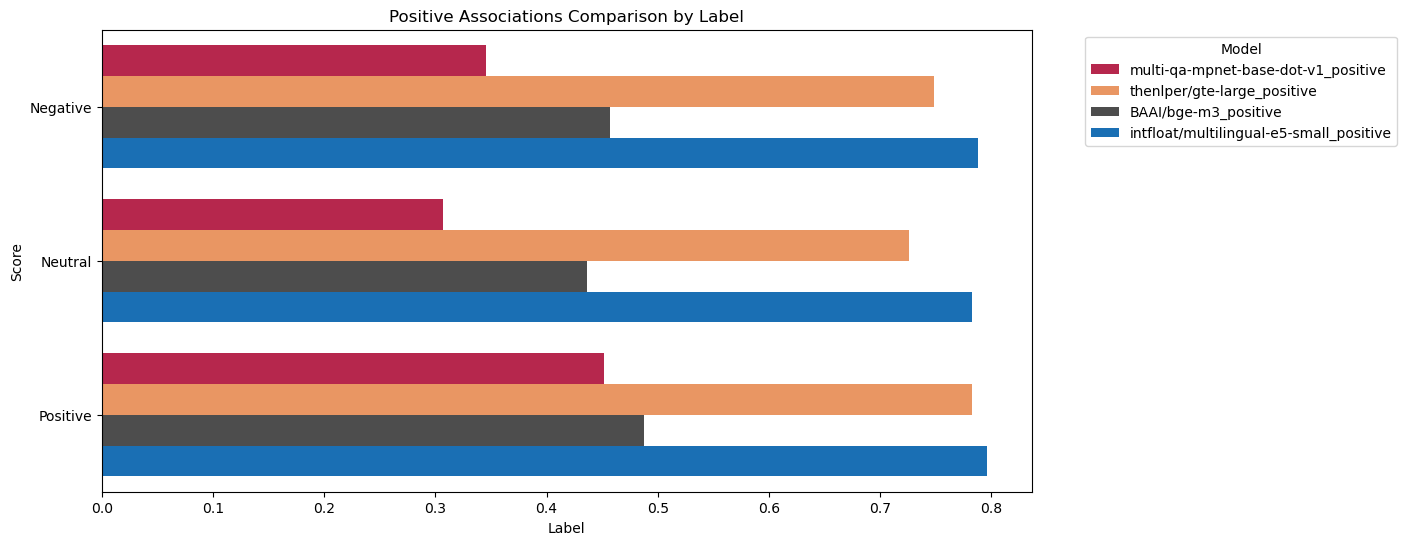

In [46]:

df_long = positive_aggregate.melt(id_vars='label', var_name='model', value_name='value')
df_long.head() 


# Custom color palette for each model
positive_custom_palette = {
    'multi-qa-mpnet-base-dot-v1_positive': '#CE0F42',      # Dodger blue
    'thenlper/gte-large_positive': '#FF914D',              # Tomato
    'BAAI/bge-m3_positive': '#4D4D4D',                     # Lime green
    'intfloat/multilingual-e5-small_positive': '#0072CE'   # Gold
}

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(y='label', x='value', hue='model', data=df_long, palette=positive_custom_palette)

# Customize the plot
plt.title('Positive Associations Comparison by Label')
plt.xlabel('Label')
plt.ylabel('Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [47]:
def evaluate_affectiveness(df=positive_aggregate, column_name='multi-qa-mpnet-base-dot-v1_positive'): 
    # check ratio between poositive and negative 
    neg = df[df['label'] == 'Negative'][column_name].values[0]
    pos = df[df['label'] == 'Positive'][column_name].values[0]

    ratio_pos_neg = pos/neg 
    ratio_neg_pos = neg/pos


    magnitude = 'negative'
    if 'positive' in column_name:
        magnitude = 'positive'

    return ratio_pos_neg, ratio_neg_pos
# positive_aggregate

evaluate_affectiveness(df=positive_aggregate, column_name='multi-qa-mpnet-base-dot-v1_positive')


(1.3071149684229668, 0.7650436450945851)

In [48]:
columns = ['model', 'ratio_pos_neg', 'ratio_neg_pos']
positive_df = pd.DataFrame(columns=columns)
negative_df = pd.DataFrame(columns=columns)


# print("Positive Association")
for postive_columns in list(positive_custom_palette.keys()): 
    ratio_pos_neg, ratio_neg_pos = evaluate_affectiveness(df=positive_aggregate, column_name=postive_columns)
    # print(postive_columns, ratio_pos_neg, ratio_neg_pos)
    new_row = {'model': postive_columns, 'ratio_pos_neg': ratio_pos_neg, 'ratio_neg_pos': ratio_neg_pos}
    positive_df = pd.concat([positive_df, pd.DataFrame([new_row])], ignore_index=True)


# print("\nNegatives Association")
for negative_columns in list(negative_custom_palette.keys()): 
    ratio_pos_neg, ratio_neg_pos = evaluate_affectiveness(df=negative_aggregate, column_name=negative_columns)
    # print(negative_columns, ratio_neg_pos, ratio_pos_neg)
    new_row = {'model': negative_columns, 'ratio_pos_neg': ratio_pos_neg, 'ratio_neg_pos': ratio_neg_pos}
    negative_df = pd.concat([negative_df, pd.DataFrame([new_row])], ignore_index=True)




In [49]:
negative_df.sort_values(by='ratio_neg_pos', ascending=False)

,model,ratio_pos_neg,ratio_neg_pos
2,BAAI/bge-m3_negative,0.821439,1.217375
1,thenlper/gte-large_negative,0.976015,1.024575
3,intfloat/multilingual-e5-small_negative,0.995813,1.004205
0,multi-qa-mpnet-base-dot-v1_negative,1.174798,0.851210


In [51]:
negative_df['model'].unique()

array(['multi-qa-mpnet-base-dot-v1_negative',
       'thenlper/gte-large_negative', 'BAAI/bge-m3_negative',
       'intfloat/multilingual-e5-small_negative'], dtype=object)

In [50]:
positive_df.sort_values(by='ratio_pos_neg', ascending=False)

,model,ratio_pos_neg,ratio_neg_pos
0,multi-qa-mpnet-base-dot-v1_positive,1.307115,0.765044
2,BAAI/bge-m3_positive,1.068203,0.936152
1,thenlper/gte-large_positive,1.045085,0.956860
3,intfloat/multilingual-e5-small_positive,1.010400,0.989707


In [53]:
combined_df['label'].unique() 

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [65]:
# Visualize in a type oof heatmap 

text_vertization = ['multi-qa-mpnet-base-dot-v1', 'thenlper/gte-large',
                     'BAAI/bge-m3', 'intfloat/multilingual-e5-small']
def calculate_percent_difference(v1, v2): 
    return abs((v2-v1)/abs(v1)) * 100.0
for tv in text_vertization: 
    combined_df[f'{tv}_percent_difference'] = combined_df.apply(lambda x: calculate_percent_difference(x[f"{tv}_positive"], x[f"{tv}_negative"]), axis=1)


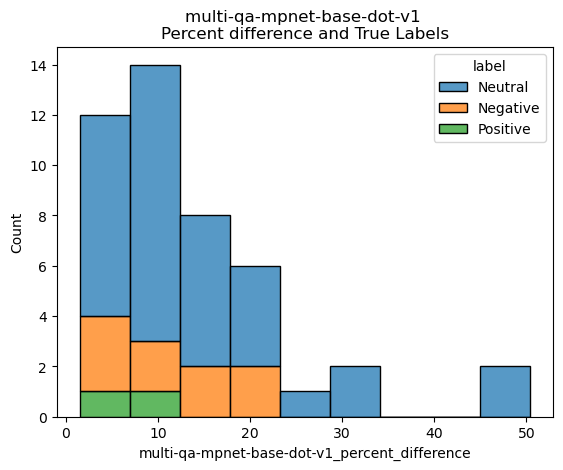

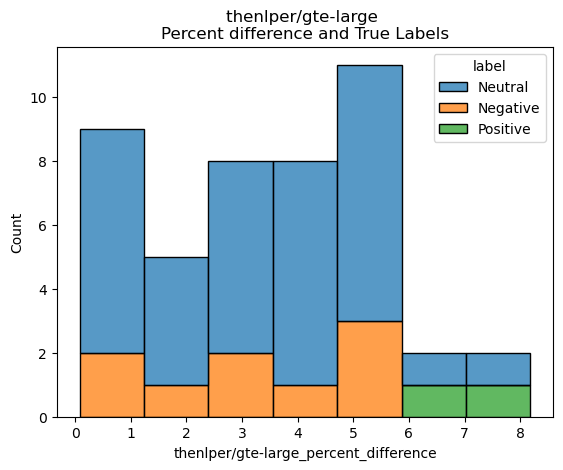

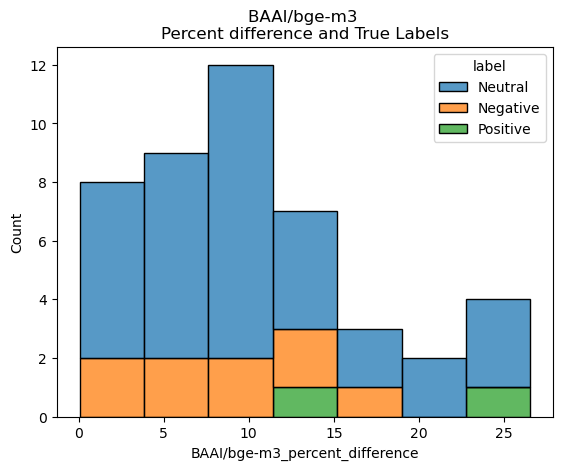

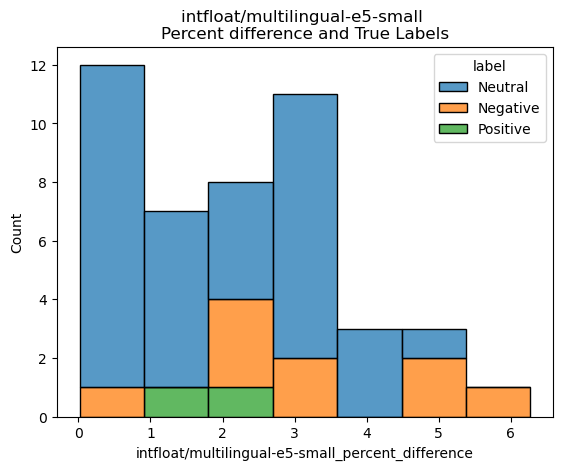

In [71]:
# combined_df['multi-qa-mpnet-base-dot-v1_positive'].head() 
for tv in text_vertization: 
    sns.histplot(data=combined_df, x=f"{tv}_percent_difference",  hue='label', multiple='stack')
    plt.title(f"{tv} \nPercent difference and True Labels")
    plt.show()

## Conclusion 

**multi-qa-mpnet-base-dot-v1_positive** is the best model that is good at finding the _positive_ posts 

**BAAI/bge-m3** is the best model that is good at finding the _negative_ posts 